In [17]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import spacy

**Loading Custom Dataset**

In [18]:
corpus = "I mean seriously The website is so popular that it cannot handle all the traffic And my only option is to check back soon It is like they are saying Sorry we are too popular right now. Try again later But seriously how many times can I check back before I just give up and try a different chatbot I donot have all day to wait for my turn to talk to a robot. I guess I will just have to stick to talking to my cat for now. At least he doesnot have a waiting list Just remember if you are trying to chat with ChatGPT and you get the same error message donot worry It just means you are not the only one who wanted to try out this fancy AI chatbot"

Since the dataset contain Small and Capital letter so, i try to convert Capital to small letter using spacy. 

In [19]:
convert = spacy.load("en_core_web_sm")
# .lower to change all of words to lower case
corpus_lower = convert(corpus.lower())

# Get list of word from corpus tokenized because it easier to work with (I do not sure the correct ways to
# do this but I think this should be ok for now)
word_list = []
for word in corpus_lower:
    word_list.append(''+word.text+'')

word_list[0:15]

['i',
 'mean',
 'seriously',
 'the',
 'website',
 'is',
 'so',
 'popular',
 'that',
 'it',
 'can',
 'not',
 'handle',
 'all',
 'the']

After converting every character to small letter; I try to use same format that we use on class like [[],[],[]].

In [20]:
corpus_tokenized = []
temp1 = []
counter = 0
for word in word_list:
    if counter == 20:
        corpus_tokenized.append(temp1)
        counter = 0
        temp1 = []
    temp1.append(word)
    counter = counter + 1

corpus_tokenized[0:5]

[['i',
  'mean',
  'seriously',
  'the',
  'website',
  'is',
  'so',
  'popular',
  'that',
  'it',
  'can',
  'not',
  'handle',
  'all',
  'the',
  'traffic',
  'and',
  'my',
  'only',
  'option'],
 ['is',
  'to',
  'check',
  'back',
  'soon',
  'it',
  'is',
  'like',
  'they',
  'are',
  'saying',
  'sorry',
  'we',
  'are',
  'too',
  'popular',
  'right',
  'now',
  '.',
  'try'],
 ['again',
  'later',
  'but',
  'seriously',
  'how',
  'many',
  'times',
  'can',
  'i',
  'check',
  'back',
  'before',
  'i',
  'just',
  'give',
  'up',
  'and',
  'try',
  'a',
  'different'],
 ['chatbot',
  'i',
  'donot',
  'have',
  'all',
  'day',
  'to',
  'wait',
  'for',
  'my',
  'turn',
  'to',
  'talk',
  'to',
  'a',
  'robot',
  '.',
  'i',
  'guess',
  'i'],
 ['will',
  'just',
  'have',
  'to',
  'stick',
  'to',
  'talking',
  'to',
  'my',
  'cat',
  'for',
  'now',
  '.',
  'at',
  'least',
  'he',
  'doesnot',
  'have',
  'a',
  'waiting']]

Getting unique word.

In [21]:
# Get word sequences and unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus_tokenized)))
vocab

['for',
 'list',
 'saying',
 'check',
 'doesnot',
 'traffic',
 'times',
 'the',
 'that',
 'trying',
 'they',
 'day',
 'chatbot',
 'least',
 'a',
 'i',
 'talking',
 'option',
 'are',
 'many',
 'before',
 'how',
 'remember',
 'only',
 'robot',
 'like',
 '.',
 'waiting',
 'chatgpt',
 'later',
 'seriously',
 'talk',
 'back',
 'at',
 'try',
 'all',
 'sorry',
 'chat',
 'stick',
 'popular',
 'guess',
 'wait',
 'you',
 'he',
 'it',
 'can',
 'with',
 'error',
 'worry',
 'handle',
 'cat',
 'now',
 'to',
 'get',
 'turn',
 'too',
 'will',
 'again',
 'up',
 'so',
 'same',
 'message',
 'give',
 'and',
 'if',
 'donot',
 'we',
 'right',
 'website',
 'different',
 'but',
 'just',
 'soon',
 'mean',
 'my',
 'not',
 'is',
 'have']

In [22]:
# Numericalize

word2index = {w: i for i, w in enumerate(vocab)}
index2word = {v:k for k, v in word2index.items()}

print(word2index)

{'for': 0, 'list': 1, 'saying': 2, 'check': 3, 'doesnot': 4, 'traffic': 5, 'times': 6, 'the': 7, 'that': 8, 'trying': 9, 'they': 10, 'day': 11, 'chatbot': 12, 'least': 13, 'a': 14, 'i': 15, 'talking': 16, 'option': 17, 'are': 18, 'many': 19, 'before': 20, 'how': 21, 'remember': 22, 'only': 23, 'robot': 24, 'like': 25, '.': 26, 'waiting': 27, 'chatgpt': 28, 'later': 29, 'seriously': 30, 'talk': 31, 'back': 32, 'at': 33, 'try': 34, 'all': 35, 'sorry': 36, 'chat': 37, 'stick': 38, 'popular': 39, 'guess': 40, 'wait': 41, 'you': 42, 'he': 43, 'it': 44, 'can': 45, 'with': 46, 'error': 47, 'worry': 48, 'handle': 49, 'cat': 50, 'now': 51, 'to': 52, 'get': 53, 'turn': 54, 'too': 55, 'will': 56, 'again': 57, 'up': 58, 'so': 59, 'same': 60, 'message': 61, 'give': 62, 'and': 63, 'if': 64, 'donot': 65, 'we': 66, 'right': 67, 'website': 68, 'different': 69, 'but': 70, 'just': 71, 'soon': 72, 'mean': 73, 'my': 74, 'not': 75, 'is': 76, 'have': 77}


Now we use UNK, unk, < unk >  are variants of a symbol in natural language processing and machine translation to indicate an out-of-vocabulary word. Many language models do calculations upon representations of the n most frequent words in the corpus. Words that are less frequent are replaced with the < unk > symbol.

In [23]:
vocab.append('<UNK>')
word2index['<UNK>'] = 0

Now making random batch considering any window size

In [24]:
#reference https://www.kaggle.com/code/alincijov/nlp-starter-continuous-bag-of-words-cbow
def random_batch(batch_size, corpus,windowsize):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        for i in range(windowsize, len(sent) - windowsize): 
            center_word = word2index[sent[i]]
            for j in range(1,windowsize+1):
                outside_words = [word2index[sent[i-j]], word2index[sent[i+j]]]  
                for o in outside_words:
                    skipgrams.append([center_word, o])
                
   
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

Now, Testing the model

In [25]:
batch_size =2 
window_size = 2

input_batch, target_batch = random_batch(batch_size, corpus_tokenized, window_size)

print("Input: ", input_batch.shape)
print("Target: ", target_batch.shape)

Input:  (2, 1)
Target:  (2, 1)


Now, making a model

In [26]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [27]:
voc_size = len(vocab)
voc_size

79

In [28]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [53]:
print(word2index)

{'for': 0, 'list': 1, 'saying': 2, 'check': 3, 'doesnot': 4, 'traffic': 5, 'times': 6, 'the': 7, 'that': 8, 'trying': 9, 'they': 10, 'day': 11, 'chatbot': 12, 'least': 13, 'a': 14, 'i': 15, 'talking': 16, 'option': 17, 'are': 18, 'many': 19, 'before': 20, 'how': 21, 'remember': 22, 'only': 23, 'robot': 24, 'like': 25, '.': 26, 'waiting': 27, 'chatgpt': 28, 'later': 29, 'seriously': 30, 'talk': 31, 'back': 32, 'at': 33, 'try': 34, 'all': 35, 'sorry': 36, 'chat': 37, 'stick': 38, 'popular': 39, 'guess': 40, 'wait': 41, 'you': 42, 'he': 43, 'it': 44, 'can': 45, 'with': 46, 'error': 47, 'worry': 48, 'handle': 49, 'cat': 50, 'now': 51, 'to': 52, 'get': 53, 'turn': 54, 'too': 55, 'will': 56, 'again': 57, 'up': 58, 'so': 59, 'same': 60, 'message': 61, 'give': 62, 'and': 63, 'if': 64, 'donot': 65, 'we': 66, 'right': 67, 'website': 68, 'different': 69, 'but': 70, 'just': 71, 'soon': 72, 'mean': 73, 'my': 74, 'not': 75, 'is': 76, 'have': 77, '<UNK>': 0}


In [29]:
batch_size = 10

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([10, 79])

In [30]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [31]:
voc_size = len(vocab)

In [34]:
batch_size     = 10 # mini-batch size
embedding_size = 2 #so we can later plot
window_size=2
model  = Skipgram(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
import time

# Training
start_train_time = time.time()
num_epochs = 10000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch(batch_size, corpus_tokenized, window_size)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")
        


Epoch: 1000 | cost: 5.348931 | time: 0m 2s
Epoch: 2000 | cost: 4.206866 | time: 0m 4s
Epoch: 3000 | cost: 4.509042 | time: 0m 7s
Epoch: 4000 | cost: 3.816911 | time: 0m 9s
Epoch: 5000 | cost: 4.100381 | time: 0m 11s
Epoch: 6000 | cost: 4.305826 | time: 0m 13s
Epoch: 7000 | cost: 3.749539 | time: 0m 15s
Epoch: 8000 | cost: 3.366649 | time: 0m 19s
Epoch: 9000 | cost: 3.810990 | time: 0m 21s
Epoch: 10000 | cost: 3.505268 | time: 0m 25s


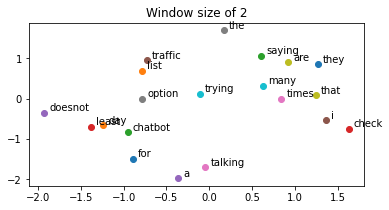

In [35]:
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_center_word(id_tensor)
    u_embed = model.embedding_outside_word(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Window size of 2')
plt.show()

Now using **CBOW**

In the CBOW model, the distributed representations of context (or surrounding words) are combined to predict the word in the middle .

In [36]:
def random_batch_cbow(batch_size, word_sequence, window_size=1):

    cbow = []

    for sent in corpus_tokenized:
        for i in range(1, len(sent) - 1): 
            target = word2index[sent[i]]
            context = []
            
            for j in range(window_size):
                
                if i - (j + 1) >= 0: 
                    context.append(word2index[sent[i - (j + 1)]])
                
                if i + (j + 1) < len(sent): 
                    context.append(word2index[sent[i + (j + 1)]])
            for w in context:
                cbow.append([context, target])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False) #randomly pick without replacement
    
    for i in random_index:
        random_inputs.append(cbow[i][0])  # Context word that we want as input
        random_labels.append([cbow[i][1]])  # Target word that we want as label
    
    return np.array(random_inputs), np.array(random_labels)

In [37]:
class Cbow(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Cbow, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [40]:
batch_size     = 10 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Cbow(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [41]:
import time
num_epochs = 10000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_cbow(batch_size, corpus_tokenized)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 4.412616 | time: 0m 2s
Epoch: 2000 | cost: 4.099398 | time: 0m 3s
Epoch: 3000 | cost: 3.088960 | time: 0m 5s
Epoch: 4000 | cost: 4.224864 | time: 0m 8s
Epoch: 5000 | cost: 3.129827 | time: 0m 11s
Epoch: 6000 | cost: 3.143769 | time: 0m 14s
Epoch: 7000 | cost: 3.260338 | time: 0m 15s
Epoch: 8000 | cost: 2.730819 | time: 0m 17s
Epoch: 9000 | cost: 3.381090 | time: 0m 19s
Epoch: 10000 | cost: 3.411564 | time: 0m 21s


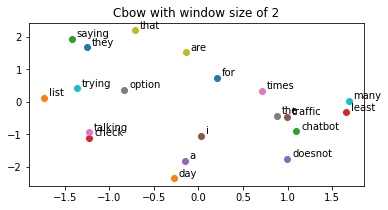

In [42]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Cbow with window size of 2')
plt.show()

Now using Negative Sampling


In [43]:
import random


def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

In [44]:
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

In [45]:
from collections import Counter
Z = 0.001
word_count = Counter(flatten(corpus_tokenized))
num_total_words = sum([c for w, c in word_count.items()])

unigram_table = []

for vo in vocab:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

In [46]:
Counter(unigram_table)

Counter({'for': 46,
         'list': 27,
         'saying': 27,
         'check': 46,
         'doesnot': 27,
         'traffic': 27,
         'times': 27,
         'the': 62,
         'that': 27,
         'trying': 27,
         'they': 27,
         'day': 27,
         'chatbot': 27,
         'least': 27,
         'a': 62,
         'i': 105,
         'talking': 27,
         'option': 27,
         'are': 62,
         'many': 27,
         'before': 27,
         'how': 27,
         'remember': 27,
         'only': 27,
         'robot': 27,
         'like': 27,
         '.': 62,
         'waiting': 27,
         'chatgpt': 27,
         'later': 27,
         'seriously': 46,
         'talk': 27,
         'back': 46,
         'at': 27,
         'try': 46,
         'all': 46,
         'sorry': 27,
         'chat': 27,
         'stick': 27,
         'popular': 46,
         'guess': 27,
         'wait': 27,
         'you': 46,
         'he': 27,
         'it': 46,
         'can': 46,
         'w

In [47]:
num_neg = 5
negative_sampling(target_batch, unigram_table, num_neg)

tensor([[62, 76, 52,  5, 51],
        [63, 74, 43,  2, 62],
        [ 4, 12, 14, 14, 58],
        [15, 43, 30, 76, 35],
        [47, 71, 10, 60, 30],
        [52, 68, 43, 76, 60],
        [52, 68,  8, 18, 71],
        [34,  3,  7, 22, 35],
        [67, 32, 38, 77, 33],
        [30, 34, 14, 34, 54]])

In [48]:
class SkipgramNeg(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(SkipgramNeg, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
        
    def forward(self, center_words, outside_words, negative_words):
        #center_words, outside_words: (batch_size, 1)
        #negative_words:  (batch_size, k)
        
        center_embed  = self.embedding_center_word(center_words)    #(batch_size, 1, emb_size)
        outside_embed = self.embedding_outside_word(outside_words)  #(batch_size, 1, emb_size)
        neg_embed     = self.embedding_outside_word(negative_words) #(batch_size, k, emb_size)
        
        uovc          =  outside_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, 1)
        ukvc          = -neg_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, k)
        ukvc_sum      =  torch.sum(ukvc, 1).view(-1, 1) #(batch_size, 1)
        
        loss = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)  #(batch_size, 1) + (batch_size, 1)
                
        return -torch.mean(loss)  #scalar, loss should be scalar, to call backward()

In [49]:
batch_size     = 2 
embedding_size = 2 
model          = SkipgramNeg(voc_size, embedding_size)
num_neg        = 10 

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [50]:
import time

start_train_time = time.time()

# Training
num_epochs = 10000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus, 2)
    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
        
    loss = model(input_batch, target_batch, negs_batch)
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 1.472255 | time: 0m 0s
Epoch: 2000 | cost: 2.422645 | time: 0m 0s
Epoch: 3000 | cost: 1.843784 | time: 0m 0s
Epoch: 4000 | cost: 0.976805 | time: 0m 0s
Epoch: 5000 | cost: 1.390384 | time: 0m 0s
Epoch: 6000 | cost: 2.252336 | time: 0m 0s
Epoch: 7000 | cost: 1.241812 | time: 0m 0s
Epoch: 8000 | cost: 1.133933 | time: 0m 0s
Epoch: 9000 | cost: 2.721428 | time: 0m 0s
Epoch: 10000 | cost: 2.375901 | time: 0m 0s


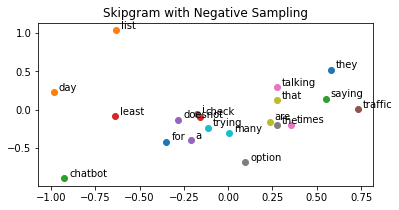

In [51]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Skipgram with Negative Sampling')
plt.show()